# Seaborn: clustermap

In [15]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Intro Visuals

In [4]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [5]:
xlabels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
ylabels = ['Coffee', 'Juice', 'Soda', 'Tea']

orders = np.array([[44, 31, 50, 41, 30], 
                   [21, 12, 28, 38, 35],
                   [15, 18, 20, 14, 12],
                   [38, 29, 39, 26, 11]]
                 )

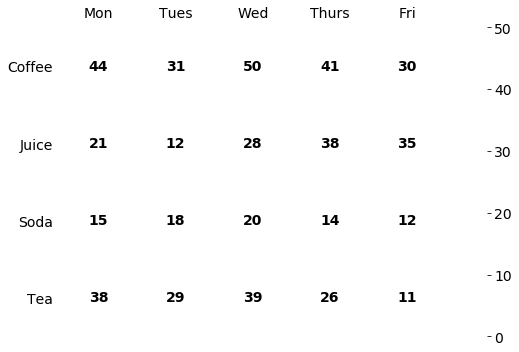

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(orders, 
            cmap='YlOrBr',
            vmin=0,
            xticklabels=xlabels,
            yticklabels=ylabels,
            annot=True,
            alpha=0,
            square=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black'}
           )
plt.yticks(rotation=0)
plt.tick_params(
    which='both',      
    bottom=False,      
    left=False,      
    labelbottom=False,
    labeltop=True) 
plt.tight_layout();

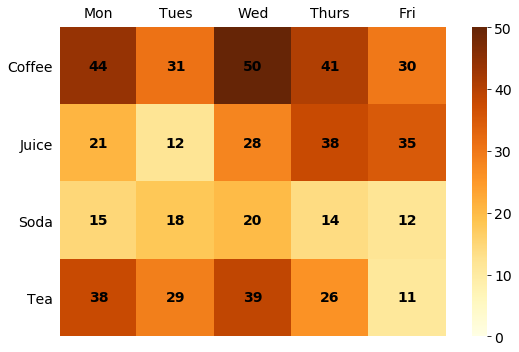

In [7]:
plt.figure(figsize=(8,5))
sns.heatmap(orders, 
            cmap='YlOrBr',
            vmin=0,
            xticklabels=xlabels,
            yticklabels=ylabels,
            annot=True,
            square=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black'}
           )
plt.yticks(rotation=0)
plt.tick_params(
    which='both',      
    bottom=False,      
    left=False,      
    labelbottom=False,
    labeltop=True) 
plt.tight_layout();

#### Color Palette Overlay

In [8]:
origin_cyl_arr = np.array([[  0.,  63.,   3.,   4.,   0.],
                           [  4.,  69.,   0.,   6.,   0.],
                           [  0.,  72.,   0.,  74., 103.]])

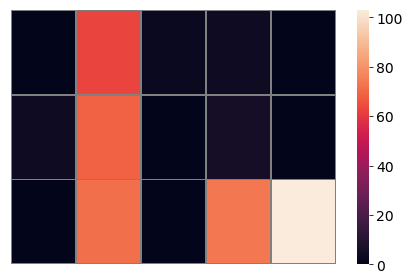

In [9]:
sns.heatmap(origin_cyl_arr, 
            xticklabels=[], 
            yticklabels=[],
            cmap='rocket',
            linewidth=1,
            linecolor='gray'
           )
plt.tight_layout();

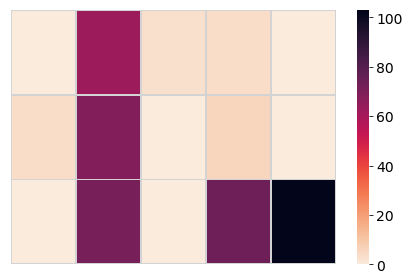

In [10]:
sns.heatmap(origin_cyl_arr, 
            xticklabels=[], 
            yticklabels=[],
            cmap='rocket_r',
            linewidth=1,
            linecolor='lightgray'
           )
plt.tight_layout();

#### Annotation Overlay

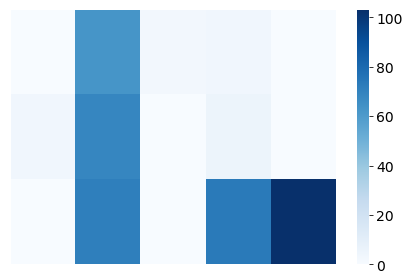

In [11]:
sns.heatmap(origin_cyl_arr, 
            xticklabels=[], 
            yticklabels=[],
            cmap='Blues'
           )
plt.tight_layout();

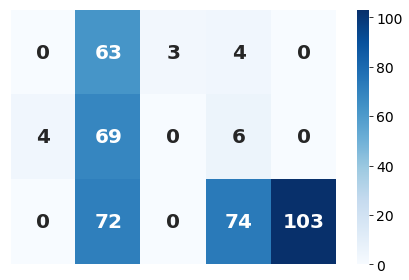

In [12]:
sns.heatmap(origin_cyl_arr, 
            xticklabels=[], 
            yticklabels=[],
            cmap='Blues',
            annot=True,
            fmt='.0f',
            annot_kws={'fontsize':20, 'fontweight': 'bold'}
           )
plt.tight_layout();
plt.savefig('11heatmap_example_withannot.svg')

In [13]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Basics - Toy Example

In [33]:
toy_data_dict = {
    'Name': ['Andy', 'Ben', 'Claire', 'David'],
    'Hours_Studied': [10, 20, 12, 28],
    'Score': [15, 20, 16, 25],
    'Street_Address': [11, 24, 18, 9]
}

In [34]:
toy_data = pd.DataFrame(toy_data_dict)
toy_data.set_index('Name', inplace=True)

toy_data

,Hours_Studied,Score,Street_Address
Name,,,
Andy,10,15,11
Ben,20,20,24
Claire,12,16,18
David,28,25,9


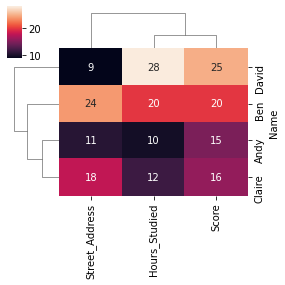

In [36]:
sns.clustermap(toy_data, figsize=(4, 4), annot=True);

## Basics - Penguins Dataset

#### Load the data

In [4]:
penguins = sns.load_dataset('penguins').dropna()

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [6]:
penguins.shape

(333, 7)

#### Build clustermap

In [37]:
numerical_cols = penguins.columns[2:6]

numerical_cols

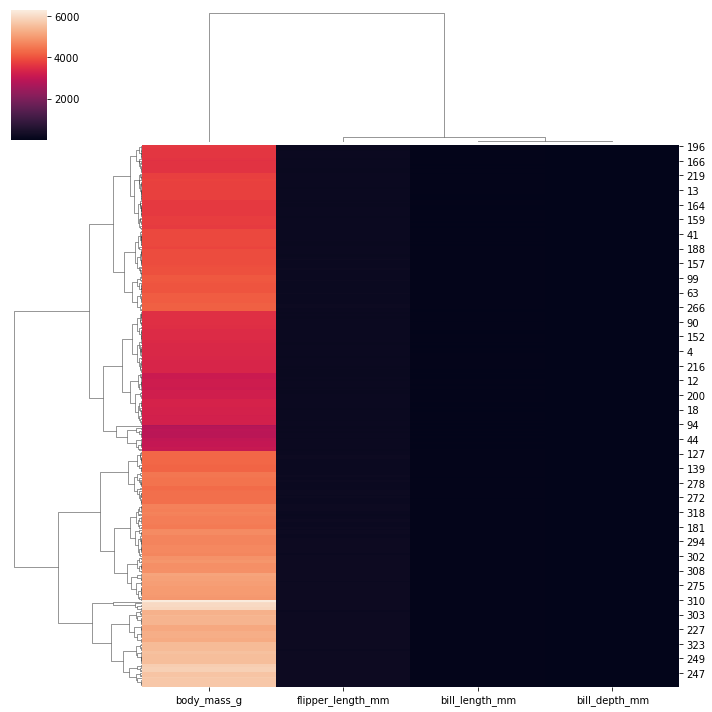

In [40]:
sns.clustermap(penguins[numerical_cols]);

#### `standard_scale`

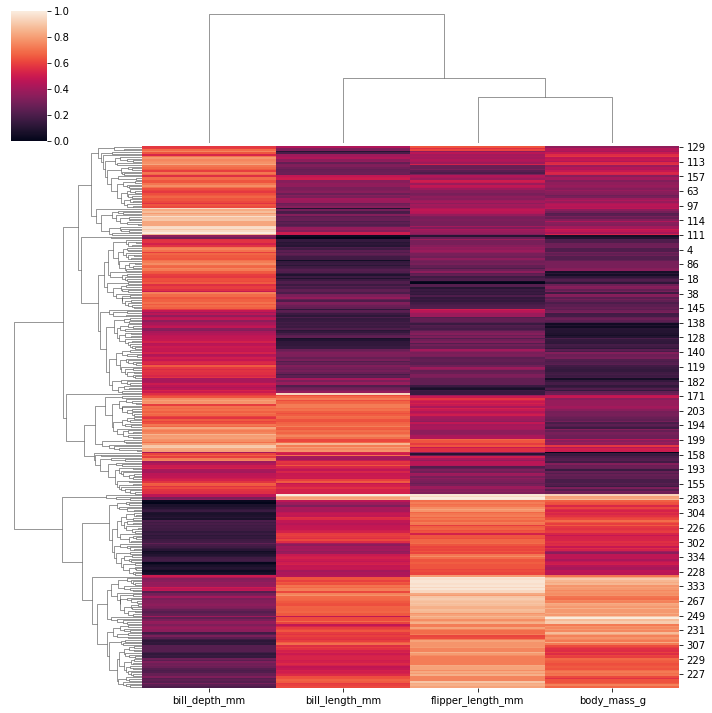

In [99]:
sns.clustermap(penguins[numerical_cols], standard_scale=1);

## Linkage and Metric

#### `method` = Linkage

Check out the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) to learn more about available linkage options.

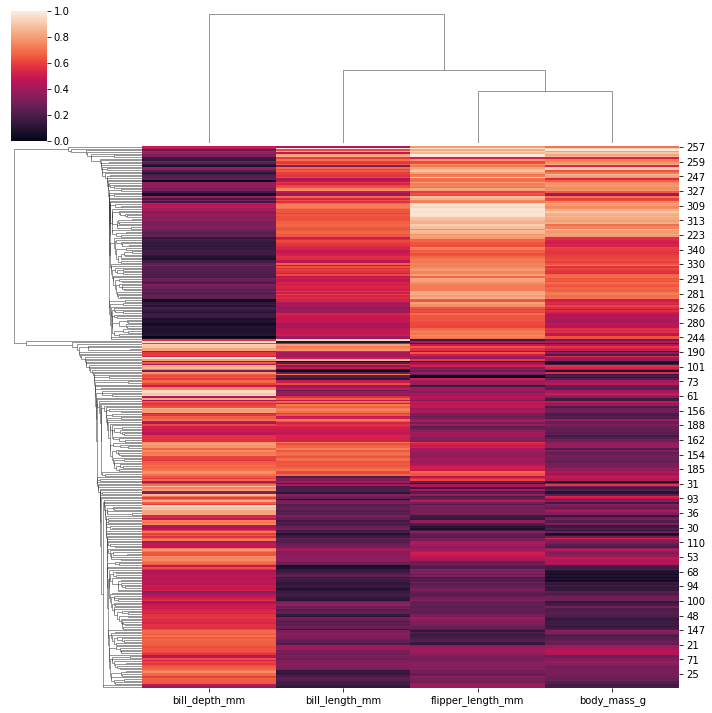

In [63]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, method='single');

#### `metric`

See `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) to learn about other available metrics.

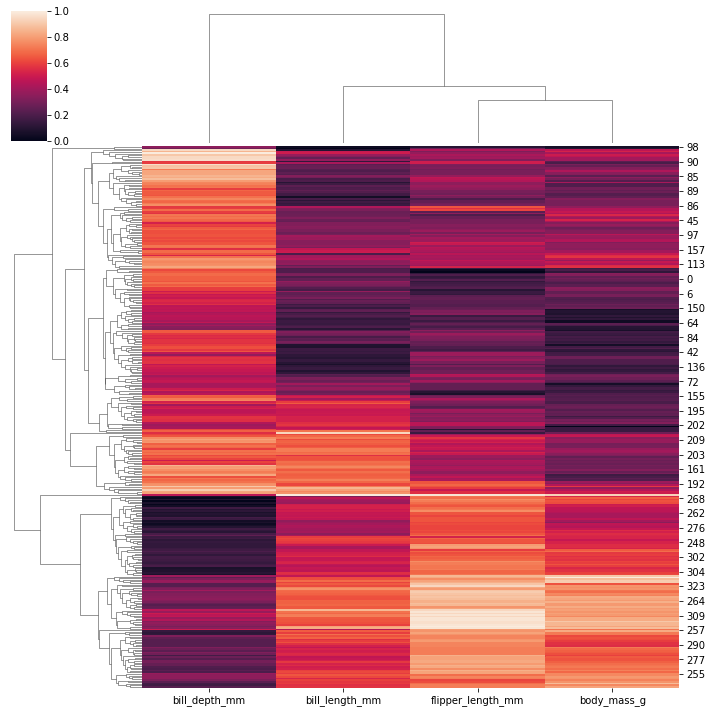

In [57]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, metric='cityblock');

## Additional Options

### `row_colors`

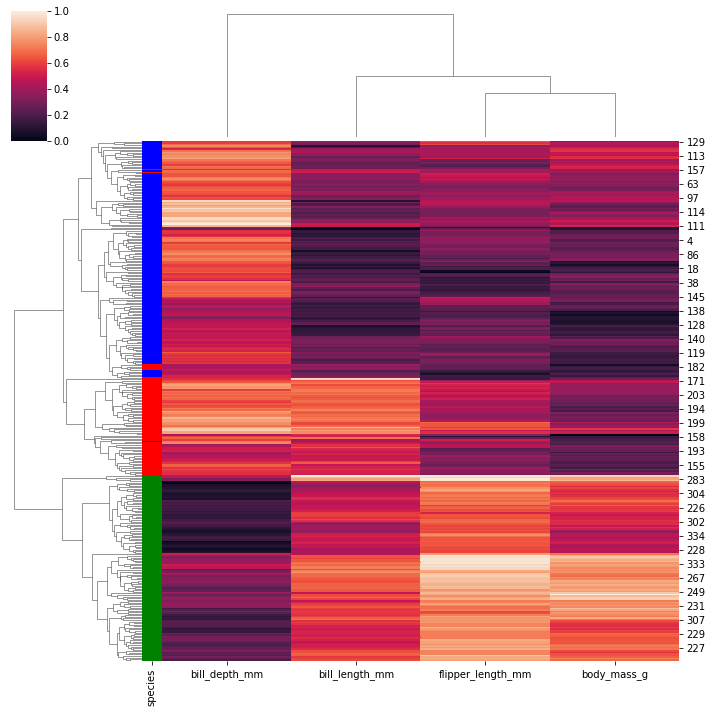

In [46]:
species_colors=penguins.species.map({
    'Adelie': 'blue',
    'Chinstrap': 'red',
    'Gentoo': 'green'
})
sns.clustermap(penguins[numerical_cols], standard_scale=1, row_colors=species_colors);

### With pandas

#### Groupby

In [56]:
penguins.groupby('species')[numerical_cols].median()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.85,18.40,190.0,3700.0
Chinstrap,49.55,18.45,196.0,3700.0
Gentoo,47.40,15.00,216.0,5050.0


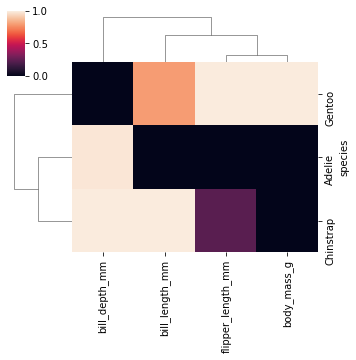

In [55]:
sns.clustermap(penguins.groupby('species')[numerical_cols].median(), 
               standard_scale=1, figsize=(5, 5));

#### Correlation

In [66]:
penguins_corr = penguins[numerical_cols].corr()

penguins_corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


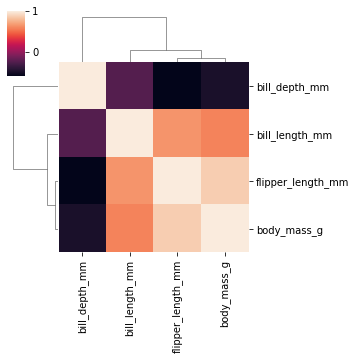

In [72]:
sns.clustermap(penguins_corr, figsize=(5, 5));

## Styling

#### `cmap` and `center`

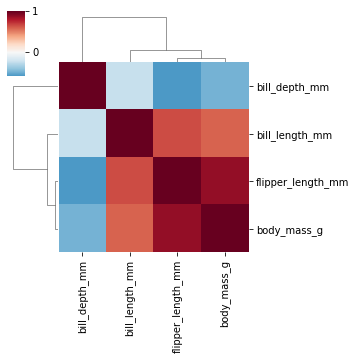

In [75]:
sns.clustermap(penguins_corr, figsize=(5, 5), cmap='RdBu_r', center=0);

#### `row_cluster` and `cbar_pos`

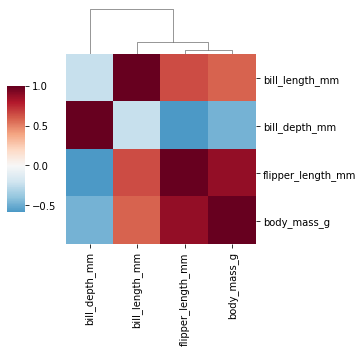

In [93]:
sns.clustermap(penguins_corr, figsize=(5, 5), cmap='RdBu_r', center=0, 
               row_cluster=False, cbar_pos=(0, .4, .05, .35));

#### Annotations with `annot` and `fmt`

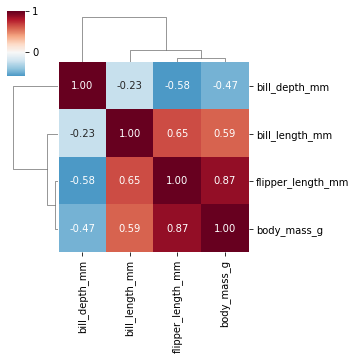

In [95]:
sns.clustermap(penguins_corr, figsize=(5, 5), cmap='RdBu_r', center=0, annot=True, fmt='.2f');